In [ ]:
#Task 2: Predict Future Stock Prices (Short-Term) 
#Objective: 
 #Use historical stock data to predict the next day's closing price.

In [5]:
pip install yfinance pandas scikit-learn matplotlib seaborn



  Using cached yfinance-0.2.65-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.18.2.tar.gz (949 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.6 MB 837.5 kB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 931.2 kB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.6 

In [11]:
import yfinance as yf   #Used to fetch historical stock data directly from Yahoo Finance.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [15]:
# Step 2: Download Historical Stock Data
ticker = 'AAPL'  # Apple stock
data = data = yf.download(ticker, start='2022-01-01', end='2024-01-01', auto_adjust=True)



[*********************100%***********************]  1 of 1 completed


In [17]:
# Step 3: View Dataset
print(data.head())
print(data.tail())
print(data.info())

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645660  179.499589  174.425155  174.542932  104487900
2022-01-04  176.378342  179.558457  175.809061  179.254190   99310400
2022-01-05  171.686722  176.839679  171.411899  176.290033   94537600
2022-01-06  168.820694  172.059699  168.467348  169.507752   96904000
2022-01-07  168.987518  170.921105  167.868591  169.694211   86709100
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2023-12-22  192.192551  193.989390  191.567126  193.761051  37149600
2023-12-26  191.646561  192.480450  191.428159  192.202487  28919300
2023-12-27  191.745819  192.093281  189.700797  191.090629  48087700
2023-12-28  192.172684  19

In [19]:
# Step 4: Feature Engineering
# Predict next day's Close based on current day features
data['Next_Close'] = data['Close'].shift(-1)

In [21]:
# Drop the last row (it has NaN in Next_Close)
data = data.dropna()

In [23]:
# Features and target
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Next_Close']

In [25]:
# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [27]:
# Step 6a: Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [29]:
# Step 6b: Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [36]:
# Step 7: Evaluation
def evaluate_model(name, y_test, predictions):
    print(f"\n{name} Performance:")
    print("MAE:", mean_absolute_error(y_test, predictions))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)


Linear Regression Performance:
MAE: 1.8766536113742243
RMSE: 2.399810693151502

Random Forest Performance:
MAE: 2.176108799743652
RMSE: 2.855682054579105


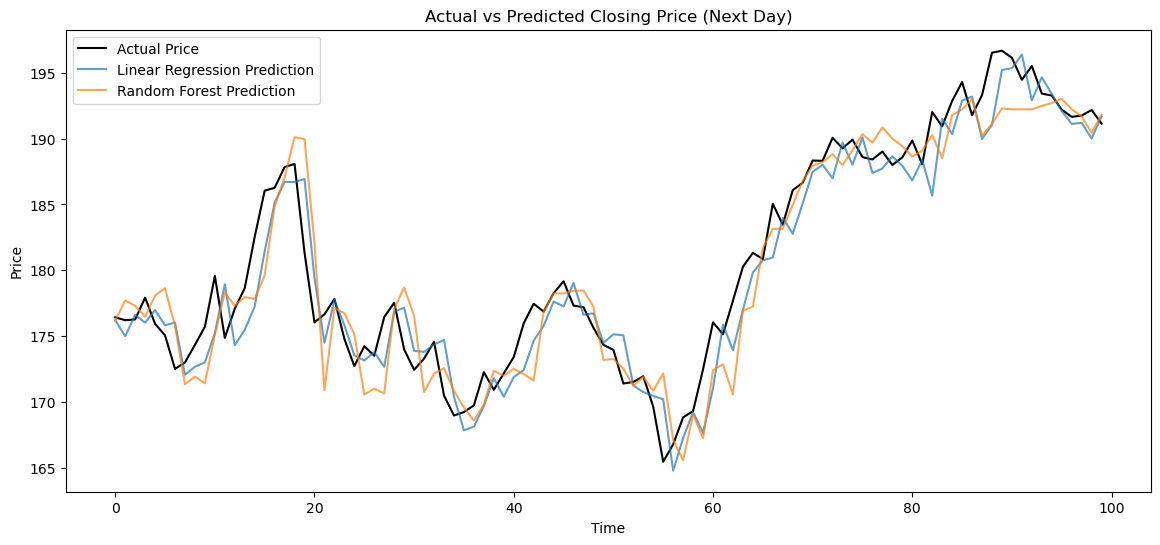

In [40]:
# Step 8: Plot Predictions vs Actual
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Price', color='black')
plt.plot(lr_preds, label='Linear Regression Prediction', alpha=0.7)
plt.plot(rf_preds, label='Random Forest Prediction', alpha=0.7)
plt.title("Actual vs Predicted Closing Price (Next Day)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
##  Final Insights – Task 2: Stock Price Prediction

# 1. Data Source and  Objective 
# We used Apple Inc. (AAPL) stock data from **Yahoo Finance** via the `yfinance` API to build a machine learning model that predicts the **next day’s closing price** based on current day values like Open, High, Low, and Volume.

# 2. Clean and Consistent Data 
#   The dataset had no missing values and contained all required features for a short-term prediction task.

#  3. Feature Impact  
#   Features like Open, High, Low, and Volume helped predict the next day's Close price.  
#   These features are strongly correlated with stock movement and proved useful for the models.

# 4. Model Comparison  
#   Linear Regression captured basic trends but underperformed due to the complexity of real-world stock data.
#   Random Forest Regressor performed better by capturing nonlinear patterns, resulting in lower MAE and RMSE.

# 5. Visual Analysis  
# The actual vs predicted plot showed that the **Random Forest model closely followed the trend of real closing prices, especially during stable market periods.

# 6. Conclusion  
#    While predicting exact stock prices is inherently difficult, especially with limited features, the model was able to give reasonably accurate next-day predictions.
#    More advanced models or additional features (like technical indicators, market news sentiment, etc.) could further improve performance.
